<a href="https://colab.research.google.com/github/andrecsq/trabalho_simulacao/blob/main/simulacao_eventos_por_infector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Implementação Eventos Intermitentes por Infector

In [ ]:
import queue
from dataclasses import dataclass, field

@dataclass(order=True)
class Event:
  time: float
  event_type: str=field(compare=False)
  source: int=field(compare=False)
  target: int=field(compare=False, default=None)

In [ ]:
def generate_new_infection(t, rate, node):
    infection_time = np.random.exponential(1/rate) 
    infection_event = Event(t + infection_time, 'infection', node)
    return infection_event

def initialize_queue_and_rec_time(rate_trans, gamma, total_population, initial_infected):
  q = queue.PriorityQueue()
  rec_time = [0] * total_population

  for i in range(initial_infected):
    cure_time = np.random.exponential(1/gamma)
    q.put(generate_new_infection(0, rate_trans, i))
    cure_event = Event(cure_time, 'cure', i)
    q.put(cure_event)
    rec_time[i] = cure_time    

  # VEZES A PROBABILIDADE DE SER UM SUSCETIVEL
  
  return q, rec_time

In [ ]:
def is_infection_sucessful(rate_trans, gamma, q, t, population, rec_time, node):

  new_infected = np.random.randint(population)
  
  # se o contato aleatório que eu escolhi está suscetível
  if rec_time[new_infected] < t: 
    # asdfsdfds
    cure_time = np.random.exponential(1/gamma)
    q.put(generate_new_infection(t, rate_trans, new_infected))
    cure_event = Event(t + cure_time, 'cure', new_infected) 
    q.put(cure_event)
    rec_time[new_infected] = t + cure_time
    events.append(Event(t, 'infected', new_infected, node))

    return True
  return False

In [ ]:
def simulate_epidemic(rate_trans, gamma, total_population, initial_infected, max_time):
  q, rec_time = initialize_queue_and_rec_time(rate_trans, gamma, total_population, initial_infected)
  curr_infected = initial_infected
  curr_time = 0
  times = []
  amount_infected = []

  while not q.empty():
    e = q.get()
    curr_time = e.time
    
    if e.time > max_time:
      return times, amount_infected
    if e.event_type == 'cure':
      ##events.append(Event(curr_time, 'cure', e.source))
      curr_infected -= 1
    elif e.event_type == 'infection':
      if curr_time < rec_time[e.source]: # checa se o nó ainda está infectado
        curr_infected += is_infection_sucessful(rate_trans, gamma, q, curr_time, total_population, rec_time, e.source)
        q.put(generate_new_infection(curr_time, rate_trans, e.source))

    times.append(e.time)
    amount_infected.append(curr_infected)

    if curr_infected == 0:
      break
  
  return times, amount_infected

In [ ]:
contacts_per_unit_time = 50
rate_transmission = 0.5

gamma = 0.1

total_population = 2000
initial_infected = 10
max_time = 200

In [ ]:
events = []
times, amount_infected = simulate_epidemic(rate_transmission, 
                                          gamma, 
                                          total_population,
                                          initial_infected,
                                          max_time)

In [ ]:
#for event in events:
  #print(event)


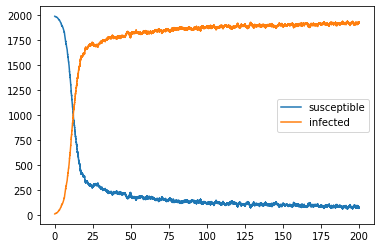

In [ ]:
amount_susceptible = total_population - np.array(amount_infected)
new_times = np.array(times) 
plt.plot(new_times, amount_susceptible, label='susceptible')
plt.plot(new_times, amount_infected, label='infected')
plt.legend()

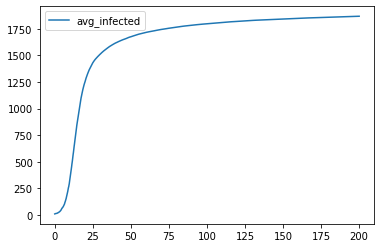

In [ ]:
cumsum_infected = np.cumsum(amount_infected)
avg_infected = [cumsum_infected[i]/(i+1) for i in range(len(amount_susceptible))]
plt.plot(new_times, avg_infected, label='avg_infected')
plt.legend()